<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=center>
<font face="IranNastaliq" size=30>
<p></p>
به نام خدا
</font>
<br>
<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
</font>
<br>
<font color=blue>
داده‌ساختارها و الگوریتم‌ها
</font>
</div>
علی شریفی زارچی
<span style="float:left;">
ترم دوم سال تحصیلی ۱۳۹۴-۹۵
</span>
<hr/>
<font color=red size=6>
<p></p>

<div align=center>
فصل پنجم: تحلیل سرشکن</div>
</font>
<div align=left>
ایلیاد رمضانی و محمدمهدی جهان‌آرا</div>
<hr>
</font></div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<font color=#FF7500>تحلیل بدبینانه؟
</font><p></p>
در بخش قبلی با تحلیل الگوریتم‌ها در بدترین حالت آشنا شدیم، در واقع یادگرفتیم چگونه برای هزینه‌ی اعمال در بدترین حالت کران بالا پیدا کنیم. گاهی ممکن است با داده‌ساختاری مواجه شویم که هزینه‌ی یک عمل در آن بعضی مواقع بسیار بیشتر تر از مواقع دیگر است! شمارنده‌ی دودویی یکی از این داده‌ساختار هاست.<br /> <br/>

<font color=#FF7500>
شمارنده‌ی دودویی:
</font><p></p>
فرض کنید یک شمارندهٔ دودویی n بیتی داریم که درابتدا عدد 0 را نشان می‌دهد. در هر مرحله عددی که این نمایشگر نشان می‌دهد یک واحد زیاد می‌کنیم. فرض کنید برای تغییر هر بیت از این شمارنده باید یک تومان پول بپردازیم.
برای مثال در زیر هزینه مراحل یک شمارندهٔ دودویی ۳ بیتی نشان داده شده است:
<p></p>

<div align="center">
<table>
<tr>
    <td>مرحله</td>
    <td>بیت ۱</td>
    <td>بیت ۲</td>
    <td>بیت ۳</td>
    <td>هزینه</td>
</tr>
<tr>
    <td>صفر</td>
    <td>۰</td>
    <td>۰</td>
    <td>۰</td>
    <td>۰</td>
</tr>
<tr>
    <td>یک</td>
    <td>۱</td>
    <td>۰</td>
    <td>۰</td>
    <td>۱</td>
</tr>
<tr>
    <td>دو</td>
    <td>۰</td>
    <td>۱</td>
    <td>۰</td>
    <td>۲</td>
</tr>
<tr>
    <td>سه</td>
    <td>۱</td>
    <td>۱</td>
    <td>۰</td>
    <td>۱</td>
</tr>
<tr>
    <td>چهار</td>
    <td>۰</td>
    <td>۰</td>
    <td>۱</td>
    <td>۳</td>
</tr>
<tr>
    <td>پنج</td>
    <td>۱</td>
    <td>۰</td>
    <td>۱</td>
    <td>۱</td>
</tr>
</table>
</div>

<p></p>
هزینه‌ی اضافه کردن عدد شمارنده در هر مرحله دست بالا از $ O(n)$ است. مثلا حالتی که شمارنده عدد $2 ^ {n} -1 $ را نشان می‌دهد در نظر بگیرید، برای زیاد کردن عدد شمارنده باید مقدار $n$ بیت را عوض کنیم. با این حساب اگر بخواهیم تا $m$ بشماریم هزینه‌ی کل از مرتبه‌ی$ O(n \times m)$ خواهد بود، اما در واقعیت هزینه‌ی بسیار کمتر است!
<p></p>
ابتدا رفتار این شمارنده را به وسیله‌ی توابع زیر شبیه‌سازی می‌کنیم:
</font></div>


In [4]:
%matplotlib inline
from matplotlib.pyplot import *
rcParams.update({'font.size': 25, 'font.family': 'serif', 'lines.linewidth':3})

In [57]:
def increase(counter):
    n = len(counter)
    cost = 0
    for i in range(n-1, -1, -1): # Reverse loop from n-1 to 0
        cost += 1
        if counter[i] == 1:
            counter[i] = 0
        else:   # counter[i] == 0
            counter[i] = 1
            break;
    return cost

def simulate(n, m): 
    # n: length of counter, m: number of increments
    counter = [0] * n
    cost = [0] * (m + 1)
    total_cost = [0] * (m + 1) 
    # total_cost[i] = total cost after i increament
    # total_cost[0] = 0
    for i in range(1, m + 1):
        cost[i] = increase(counter)
        total_cost[i] = cost[i] + total_cost[i - 1]
        print "Step ", i, "\tCounter ", counter,
        print "\tCost ", cost[i], "\tTotal ", total_cost[i]
    # Plot 
    plot_cost(cost, total_cost)

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
حال یک تابع برای رسم نمودار هزینه‌ی هر بار افزایش شمارنده (تعداد بیت‌هایی که باید در هر گام تغییر کنند)
</font></div>

In [67]:
def plot_cost(cost, total_cost):
    figure(figsize=(20, 10))
    xlabel("Step")
    ylabel("Step cost (blue), Total cost (green)")
    x = range(len(total_cost))
    bar(x, cost)
    plot(x, total_cost, 'g')

Step  1 	Counter  [0, 0, 0, 1] 	Cost  1 	Total  1
Step  2 	Counter  [0, 0, 1, 0] 	Cost  2 	Total  3
Step  3 	Counter  [0, 0, 1, 1] 	Cost  1 	Total  4
Step  4 	Counter  [0, 1, 0, 0] 	Cost  3 	Total  7
Step  5 	Counter  [0, 1, 0, 1] 	Cost  1 	Total  8
Step  6 	Counter  [0, 1, 1, 0] 	Cost  2 	Total  10
Step  7 	Counter  [0, 1, 1, 1] 	Cost  1 	Total  11
Step  8 	Counter  [1, 0, 0, 0] 	Cost  4 	Total  15
Step  9 	Counter  [1, 0, 0, 1] 	Cost  1 	Total  16
Step  10 	Counter  [1, 0, 1, 0] 	Cost  2 	Total  18
Step  11 	Counter  [1, 0, 1, 1] 	Cost  1 	Total  19
Step  12 	Counter  [1, 1, 0, 0] 	Cost  3 	Total  22
Step  13 	Counter  [1, 1, 0, 1] 	Cost  1 	Total  23
Step  14 	Counter  [1, 1, 1, 0] 	Cost  2 	Total  25
Step  15 	Counter  [1, 1, 1, 1] 	Cost  1 	Total  26
Step  16 	Counter  [0, 0, 0, 0] 	Cost  4 	Total  30


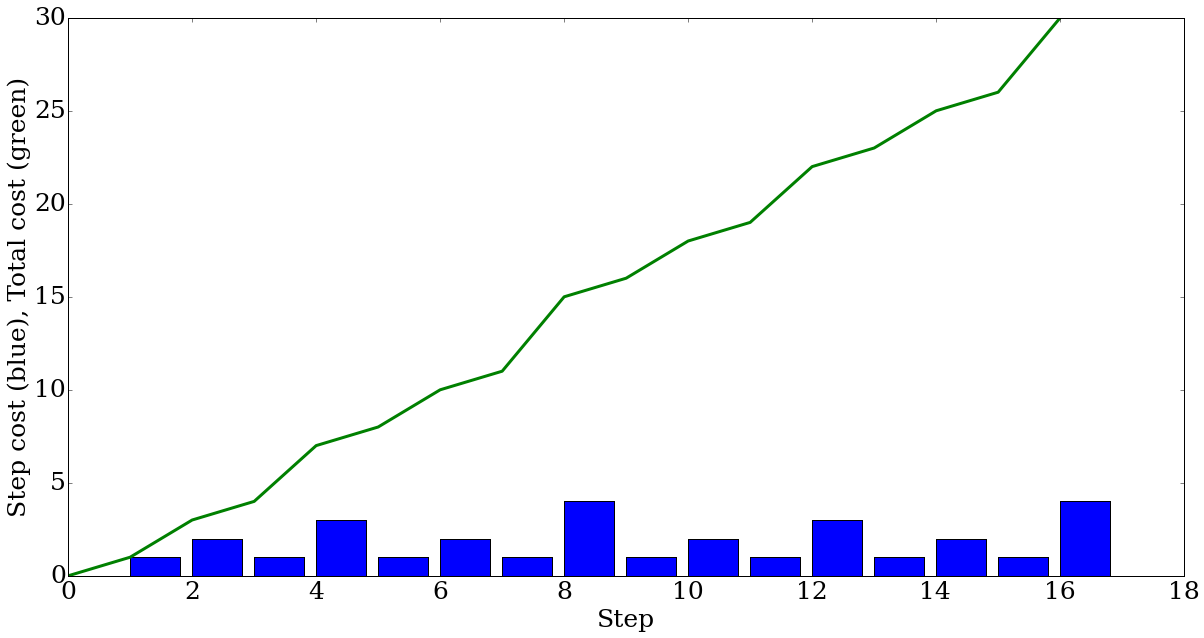

In [63]:
simulate(4, 2**4)

Step  1 	Counter  [0, 0, 0, 0, 1] 	Cost  1 	Total  1
Step  2 	Counter  [0, 0, 0, 1, 0] 	Cost  2 	Total  3
Step  3 	Counter  [0, 0, 0, 1, 1] 	Cost  1 	Total  4
Step  4 	Counter  [0, 0, 1, 0, 0] 	Cost  3 	Total  7
Step  5 	Counter  [0, 0, 1, 0, 1] 	Cost  1 	Total  8
Step  6 	Counter  [0, 0, 1, 1, 0] 	Cost  2 	Total  10
Step  7 	Counter  [0, 0, 1, 1, 1] 	Cost  1 	Total  11
Step  8 	Counter  [0, 1, 0, 0, 0] 	Cost  4 	Total  15
Step  9 	Counter  [0, 1, 0, 0, 1] 	Cost  1 	Total  16
Step  10 	Counter  [0, 1, 0, 1, 0] 	Cost  2 	Total  18
Step  11 	Counter  [0, 1, 0, 1, 1] 	Cost  1 	Total  19
Step  12 	Counter  [0, 1, 1, 0, 0] 	Cost  3 	Total  22
Step  13 	Counter  [0, 1, 1, 0, 1] 	Cost  1 	Total  23
Step  14 	Counter  [0, 1, 1, 1, 0] 	Cost  2 	Total  25
Step  15 	Counter  [0, 1, 1, 1, 1] 	Cost  1 	Total  26
Step  16 	Counter  [1, 0, 0, 0, 0] 	Cost  5 	Total  31
Step  17 	Counter  [1, 0, 0, 0, 1] 	Cost  1 	Total  32
Step  18 	Counter  [1, 0, 0, 1, 0] 	Cost  2 	Total  34
Step  19 	Counter  [1, 0

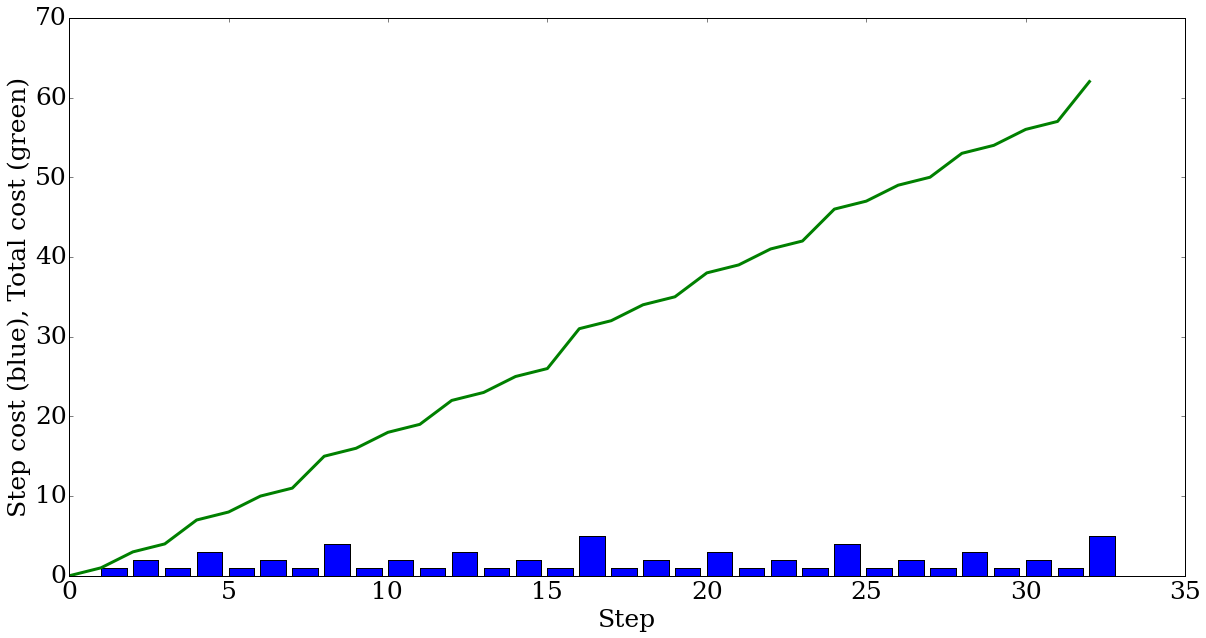

In [64]:
simulate(5, 2**5)

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
نکته‌ی جالب اینست که قبل از هر عمل پر هزینه در شمارنده‌ی دودویی چندین عمل کم هزینه‌تر داریم. در واقع به ازای هر i، هر $2^ {i - 1}$ مرحله یکبار بیت i-ام را تغییر می‌دهیم! پس برای شمردن از 0 تا m باید $\sum_{i=1}^{\lfloor lg m \rfloor } \frac{m}{2 ^ {i}} \leq 2m$ هزینه بپردازیم که بسیار کمتر از $n \times m$ است. 
<p></p>
به عنوان مثال برای ۳۲ بار افزایش یک شمارنده‌ی ۵ بیتی مجموع هزینه ۶۲ است، در حالی که $n\times m = 5 \times 32 = 160$
</font></div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<font color=#FF7500>
تحلیل سرشکن</font><p></p>
<p></p>
شمارنده‌ی دودویی مثالی از داده‌ساختار‌هایی بود که هزینه‌ی یک عمل در آن بعضی مواقع بسیار بیشتر تر از مواقع دیگر است، همچنین دیدیم که قبل از هر عمل پرهزینه باید تعداد زیادی عمل کم‌هزینه‌تر انجام شود. در رویارویی با داده‌ساختارهای شبیه به شمارنده‌ی دودویی تحلیل بدترین حالت به یک کران بالای درست ولی بدبینانه می‌انجامد. 
<br/><br/>
تحلیل ‌سرشکن نوعی از تحلیل برای مواقعی است که دنباله‌ای از اعمال مشابه انجام می‌شود. ایده‌ی تحلیل سرشکن در نظر گرفتن هزینه‌ی میانگین دنباله‌ای از اعمال در بدترین حالت به جای در نظر گرفتن هزینه‌ی یک عمل در بدترین حالت است. سودمندی این نوع تحلیل زمانی مشخص می‌شود که قبل از انجام هر عمل پرهزینه تعداد قابل توجه‌ی عمل کم‌هزینه‌تر انجام می‌شود. مثلا در شمارنده‌ی دودویی هزینه‌ی میانگین هر عمل در بدترین حالت برابر با $\frac {2m}{m} = O(1)$ است در حالی که هزینه‌ی یک عمل در بدترین حالت از مرتبه‌ی $O(nm)$ است.

</font></div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<font color=#FF7500>
مثال : پیاده سازی پشته با استفاده از آرایه
</font><p></p>
می‌خواهیم یک پشته را با استفاده از آرایه پیاده سازی کنیم. فرض کنید یک آرایه به نام A و یک متغیر به نام top داریم که اندیس اولین خانه ی خالی‌ A است.
<br />
برای پیاده سازی تابع اضافه کردن عدد x به پشته (push) کافی است عملیات زیر را انجام دهیم:
<p></p>


</font></div>

In [1]:
def push(x):
    A[top] = x
    top = top + 1

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<p></p>
برای پیاده سازی تابع حذف آخرین  عدد پشته و برگرداندن آن (pop) کافی است عملیات زیر را انجام دهیم:

</font></div>

In [1]:
def pop():
    top = top - 1
    x = A[top]

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=3>
(در کد بالا فرض کردیم که top مخالف 0 باشد)

</font></div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
با توجه محدود بودن طول آرایه، اگر آرایه هنگام اضافه کردن عضو جدید به پشته پر شده باشد باید چه کنیم؟ باید یک آرایه با طولی بزرگتر از طول آرایهٔ فعلی تعریف کنیم، اعضای آرایهٔ قبلی را به آرایهٔ جدید منتقل کنیم و کار را در آن‌ ادامه دهیم.
<br/>
این عملیات هزینهٔ زیادی به دنبال دارد، در نتیجه عملیات اضافه کردنی که منجر به این اتفاق می‌شوند زمان گیر خواهند بود، ولی‌ با توجه به هزینهٔ کم بسیاری از عملیات که ما را به این مرحله رسانده اند، اگر هزینهٔ سرشکن برای هر عملیات‌ را حساب کنیم، شاید هزینهٔ ی بسیار کمتری شود. فرض می‌کنیم که هزینهٔ انتقال یک آرایه به طول n به آرایهٔ جدید برابر n است.

</font></div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<br />
حالت اول:
<br/>
اگر هنگام تعریف آرایهٔ جدید طول آن را یکی‌ بیش از طول آرایهٔ قبلی قرار دهیم، هزینهٔ سرشکن کل عملیات معقول میشود؟
<br />
خیر. اگر n عملیات اضافه کردن متوالی را در نظر بگیریم، هزینهٔ کپی‌ کردن اعداد به ترتیب برابر ۱، ۲، ...،$n-1$ خواهد شد، پس کل هزینه برابر $\frac{n\times(n-1)}{2}$ است و به صورت سرشکن هر عملیات $\frac{n-1}{2}$ هزینه دارد.

</font></div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<br />
حالت دوم:
<br/>
اگر هنگام تعریف آرایهٔ جدید طول آن را دو برابر طول آرایهٔ قبلی قرار دهیم، هزینهٔ سرشکن کل عملیات چه می‌شود؟
<br /> <br/>
در این حالت اگر $n$ عملیات داشته باشیم ۱ + ۲ + ۴ + ... + $2^{i}$ عملیات کپی‌ کردن خواهیم داشت که $i < log(n)$ (اگر همهٔ عملیات از نوع اضافه کردن باشند، i بزرگترین عددی است که $2^i$ کمتر از $n$ است) در نتیجه این تعداد کمتر از$ 2\times n$ عملیات است و اگر هزینهٔ $n$ عملیات دیگر را هم در نظر بگیریم، برای هر عملیات هزینهٔ سرشکن ۳ بدست می‌اید.

</font></div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<font color=#FF7500>
روش حسابداری</font><p></p>
<p></p>
یک راه دیگر برای حساب کردن هزینهٔ سرشکن عملیات، روش حسابداری می‌باشد. برای مثال، مسالهٔ قبل را دوباره در نظر بگیرید، به ازای هر عملیات اضافه کردن، ۱ تومان هزینه برای انجام دادن آن می‌پردازیم و ۲ تومان را در یک حساب فرضی‌ می‌ریزیم. پس برای هر عملیات ۳ تومان هزینه می‌کنیم. هر وقت که مجبور به دو برابر کردن طول آرایه شدیم، از پولی‌ که در حسابمان ذخیره کرده ایم استفاده می‌کنیم. چرا هیچ‌وقت پول کم نمی‌اوریم؟
<br/><br/>
فرض کنید طول آرایه‌ای که پر شده است و قصد انتقال آن‌ را داریم برابر L است. پس اگر $L$ تومان پول در بانک داشته باشیم میتوانیم هزینهٔ انتقال آرایه را بپردازیم.توجه کنید که از آخرین باری که عملیات انتقال را انجام داده ایم،$\frac {L}{2} $اضافه کردن داشته‌ایم.
<br/>
و در نتیجه در حسابمان حداقل به مقدار $L$ تومان پول داریم.
<br/>
پس اگر برای هر عملیات ۳ تومان هزینه کنیم، همواره میتوانیم همهٔ هزینه‌ها را پرداخت کنیم. در نتیجه هزینهٔ سرشکن هر عملیات برابر ۳ است.
<br/> <br/>
دقت کنید که در محاسبه هزینهٔ سرشکن، هزینه‌ای که بدست می‌آوریم به ازای هر ترتیبی از عملیات داده شده همچنان حداکثر میانگین هزینهٔ عملیات است و بر خلاف حساب کردن مرتبه زمانی متوسط، ما راجع به ورودی فرضی‌ مانند تصادفی بودن آن‌‌ها نکردیم، فقط میانگین هزینهٔ عملیات در طول زمان را حساب کردیم.

<br/><br/>
به نظر شما با استفاده از روش حسابداری چگونه می‌توان مسالهٔ شمارندهٔ دودویی را حل کرد؟
</font></div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<font color=#FF7500>
تحلیل شمارنده‌ی دودویی به روش حسابداری</font><p></p>
<p></p>
<p></p>
برای تغییر هر بیت ۰ به ۱، ۱تومان هزینه می‌کنیم و ۱ تومان هم پس انداز می‌کنیم. برای راحتی کار فرض کنید که هر بیت حساب جداگانه‌ای برای خودش دارد، در نتیجه هر گاه که می‌خواهیم یک بیت ۱ را به ۰ تغییر دهیم، چون قبلاً این بیت از ۰ به ۱ تبیدل شده است ۱ تومان در حسابش دارد، پس از همان پول برای تغییر این بیت استفاده می‌کنیم. هر مرحله می‌تواند تعدادی تغییر بیت از ۱ به ۰ داشته باشد، ولی‌ دقیقا یک بیت از ۰ به ۱ تغییر پیدا می‌کند، در نتیجه هزینه‌ای که برای هر مرحله می‌پردازیم برابر ۲ تومان است که معادل هزینه سرشکن هر مرحله می‌باشد.
</font></div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<font color=#FF7500>
مثال : پشته با حافظه‌ی بهینه</font><p></p>
<p></p>
<p></p>
در مسالهٔ پیاده سازی پشته، طول آرایه را $L$ و تعداد اعضای پشته را $n$ در نظر بگیرید، می‌خواهیم L همواره از مرتبه $ O(n)$ باشد.
<br/>
در الگوریتم فعلی اگر ۱۰۰۰ عملیات اضافه کردن و سپس ۹۹۹ عملیات حذف کردن را انجام دهیم، آرایه‌ای به طول ۱۰۲۴ خواهیم داشت (چرا؟)،  که فقط ۱ خانه از آن‌ استفاده شده است و مقدار زیادی حافظهٔ بی‌استفاده گرفته شده.
<br/>
 راهکاری برای درست کردن این مشکل ارائه دهید و سپس هزینهٔ سرشکن عملیات را محاسبه کنید.
</font></div>